In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

In [2]:
df_Cars = pd.read_csv("Cars.csv")

In [3]:
print("Cars data types are:")
print(df_Cars.dtypes)

Cars data types are:
Name                  object
Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Colour                object
Seats                float64
No. of Doors         float64
New_Price             object
Price                float64
dtype: object


In [4]:
import statsmodels.tools.eval_measures as em
from sklearn.metrics import mean_squared_error  ###RMSE & MAPE values for acccuracy of the model
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt
from IPython.display import display
from pylab import rcParams

In [16]:
import pandas as pd

# Assuming you read the data from a file or created it in some way
df_Cars_Train = pd.read_csv('Cars.csv')

# Now you can access its attributes
print(df_Cars_Train.Price)

0        6.00
1        8.32
2        4.00
3        3.49
4        6.40
        ...  
5956     4.50
5957     3.67
5958     5.20
5959    55.54
5960     3.60
Name: Price, Length: 5961, dtype: float64


In [19]:
import pandas as pd

# Assuming you read the data from a file or created it in some way
df_Cars_Test = pd.read_csv('Cars.csv')

# Now you can access its attributes
print(df_Cars_Test.Price)

0        6.00
1        8.32
2        4.00
3        3.49
4        6.40
        ...  
5956     4.50
5957     3.67
5958     5.20
5959    55.54
5960     3.60
Name: Price, Length: 5961, dtype: float64


In [20]:
print(df_Cars.Price)
print(df_Cars_Train.Price)
print(df_Cars_Test.Price)

0        6.00
1        8.32
2        4.00
3        3.49
4        6.40
        ...  
5956     4.50
5957     3.67
5958     5.20
5959    55.54
5960     3.60
Name: Price, Length: 5961, dtype: float64
0        6.00
1        8.32
2        4.00
3        3.49
4        6.40
        ...  
5956     4.50
5957     3.67
5958     5.20
5959    55.54
5960     3.60
Name: Price, Length: 5961, dtype: float64
0        6.00
1        8.32
2        4.00
3        3.49
4        6.40
        ...  
5956     4.50
5957     3.67
5958     5.20
5959    55.54
5960     3.60
Name: Price, Length: 5961, dtype: float64


In [22]:
train_time = [i+1 for i in range(len(df_Cars_Train))]
test_time = [i+133 for i in range(len(df_Cars_Test))]
print('Training time instance','\n', train_time)
print('Testing time instance','\n', test_time)

Training time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

Text(0, 0.5, 'Price')

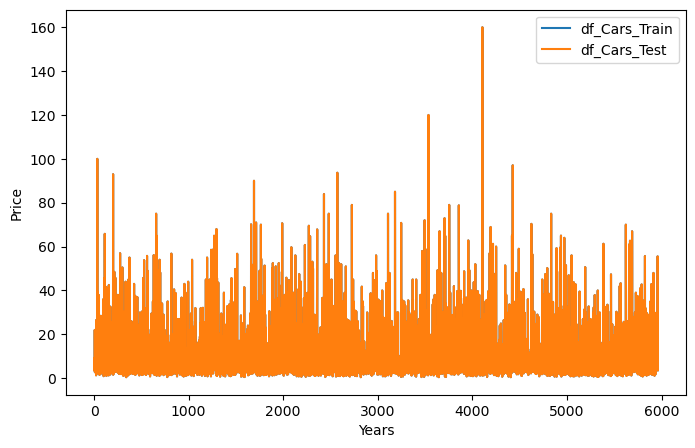

In [29]:
                                                #LINEAR REGRESSION MODEL

rcParams['figure.figsize'] = 8, 5

'''train_predictions_model1 = lr.predict(LinearRegressionTrain[['time']])
LinearRegressionTrain['RegOnTime'] = train_predictions_model1

test_predictions_model1 = lr.predict(LinearRegressionTest[['time']])
LinearRegressionTest['RegOnTime'] = test_predictions_model1'''

plt.plot(df_Cars_Train['Price'], label='df_Cars_Train')
plt.plot(df_Cars_Test['Price'], label='df_Cars_Test')
plt.legend(loc='best')
plt.xlabel("Years")
plt.ylabel("Price")


In [30]:
LinearRegressionTrain = df_Cars_Train.copy()
LinearRegressionTest = df_Cars_Test.copy()

In [33]:
LinearRegressionTrain['time'] = train_time
LinearRegressionTest['time'] = test_time

In [34]:
from sklearn.linear_model import LinearRegression

In [36]:
#creating an object of LinearRegression model

lr=LinearRegression()
lr.fit(LinearRegressionTrain[['time']], LinearRegressionTrain[['Price']])

LinearRegression()

Text(0, 0.5, 'Price')

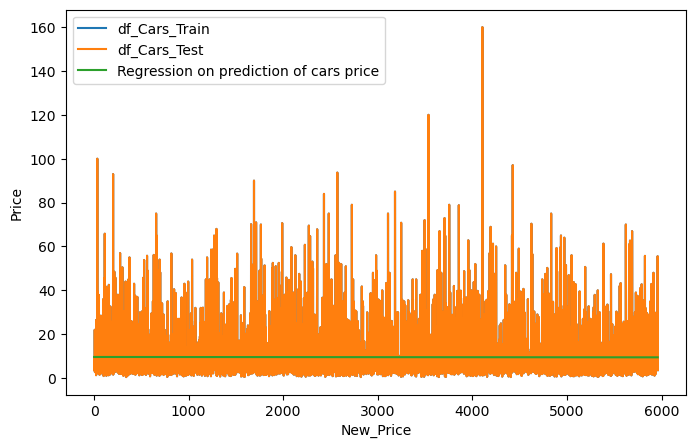

In [63]:
#make the predictiona and plot them
rcParams['figure.figsize'] = 8, 5

train_predictions_model1 = lr.predict(LinearRegressionTrain[['time']])
LinearRegressionTrain['RegOnPrice'] = train_predictions_model1

test_predictions_model1 = lr.predict(LinearRegressionTest[['time']])
LinearRegressionTest['RegOnPrice'] = test_predictions_model1

plt.plot(df_Cars_Train['Price'], label='df_Cars_Train')
plt.plot(df_Cars_Test['Price'], label='df_Cars_Test')
plt.plot(LinearRegressionTest['RegOnPrice'], label='Regression on prediction of cars price')

plt.legend(loc='best')
plt.xlabel("New_Price")
plt.ylabel("Price")

In [39]:
# defining function to for calculating Accuracy metrics

from sklearn import metrics

In [50]:
#model Evaluation

rmse_model1_test = metrics.mean_squared_error(df_Cars_Test['Price'], test_predictions_model1, squared=False)
print("For  predicting the price, price is 500000" %(rmse_model1_test))

For  predicting the price, price is 500000


In [48]:
resultDF = pd.DataFrame({'Cars Price': [rmse_model1_test]}, index=['Predicting price'])
resultDF

,Cars Price
Predicting price,11.213344


In [52]:
                                    # MODEL 2 NAIVE MODEL
NaiveModel_train = df_Cars_Train.copy()
NaiveModel_test = df_Cars_Test.copy()

In [53]:
df_Cars_Train.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
5956,Honda Civic,Pune,2011.0,47000.0,Petrol,Automatic,Second,13.9 kmpl,1799 CC,130.3 bhp,Others,5.0,4.0,NaN,4.50
5957,Hyundai i20,Delhi,2013.0,63777.0,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,Black/Silver,5.0,4.0,NaN,3.67
5958,Maruti Swift,Coimbatore,2016.0,37806.0,Petrol,Manual,First,20.4 kmpl,1197 CC,81.80 bhp,Black/Silver,5.0,4.0,NaN,5.20
5959,Mercedes-Benz SLK-Class,Coimbatore,2016.0,22732.0,Petrol,Automatic,First,18.1 kmpl,3498 CC,306 bhp,Black/Silver,2.0,2.0,NaN,55.54
5960,Hyundai i10,Kolkata,2016.0,7000.0,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,White,5.0,4.0,NaN,3.60


In [55]:
NaiveModel_test['naive'] = 5.0
NaiveModel_test['naive'].head()

0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
Name: naive, dtype: float64

Text(0, 0.5, 'Price')

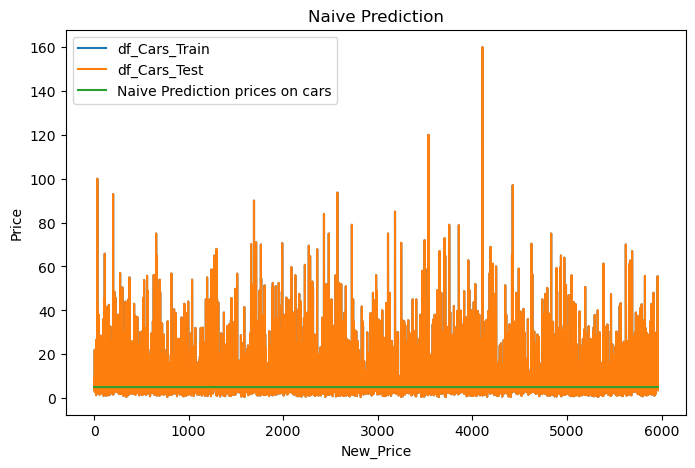

In [57]:
rcParams['figure.figsize'] = 8, 5

plt.plot(NaiveModel_train['Price'], label='df_Cars_Train')
plt.plot(df_Cars_Test['Price'], label='df_Cars_Test')

plt.plot(NaiveModel_test['naive'], label="Naive Prediction prices on cars")

plt.legend(loc='best')
plt.title("Naive Prediction")
plt.xlabel("New_Price")
plt.ylabel("Price")

In [58]:
# model evaluation

rmse_model2_test = metrics.mean_squared_error(df_Cars_Test['Price'],NaiveModel_test['naive'], squared=False)
print("For  predicting the price, price is 500000" %(rmse_model2_test))

For  predicting the price, price is 500000


In [59]:
resultDF_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]}, index=['NaiveModel'])
resultDF = pd.concat([resultDF, resultDF_2])
resultDFresultDF_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]}, index=['NaiveModel'])
resultDF = pd.concat([resultDF, resultDF_2])
resultDF

,Cars Price,Test RMSE
Predicting price,11.213344,NaN
NaiveModel,NaN,12.093179
NaiveModel,NaN,12.093179


Text(0, 0.5, 'Price')

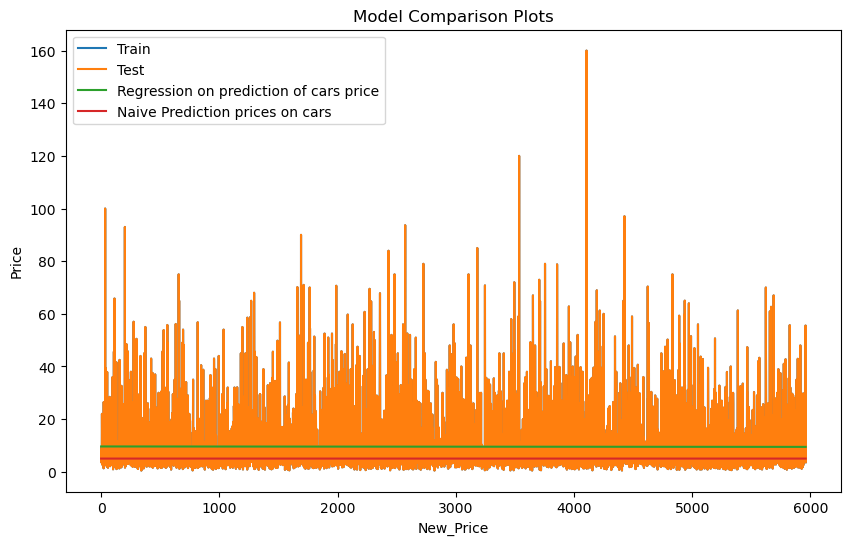

In [64]:
            #PLOTTING BOTH MODELS
rcParams['figure.figsize'] = 10, 6

plt.plot(df_Cars_Train['Price'], label='Train')
plt.plot(df_Cars_Test['Price'], label='Test')

plt.plot(LinearRegressionTest['RegOnPrice'], label='Regression on prediction of cars price')
plt.plot(NaiveModel_test['naive'], label="Naive Prediction prices on cars")

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.xlabel("New_Price")
plt.ylabel("Price")